In [41]:
import numpy as np
import pandas as pd
import seaborn as sn

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [7]:
df=pd.read_csv('/content/spam.csv')

In [8]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.shape

(5572, 2)

Showing information about the dataset.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


Checking null values

In [10]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

Duplicate values. Our dataset is too small, so I dont drop it.

In [12]:
df.duplicated().sum()

415

In [13]:
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

Converting the Labeled column into the numerical column.

In [14]:
le=LabelEncoder()
df['Category']=le.fit_transform(df['Category'])

In [15]:
df.head(1)

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."


**Showing the distribution of Category**

<Axes: xlabel='Category', ylabel='count'>

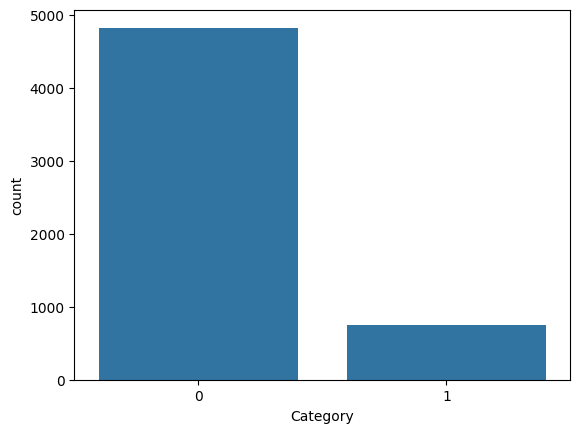

In [16]:
sn.countplot(x=df['Category'])

**Showing the distribution of messages**

<Axes: xlabel='Message', ylabel='Count'>

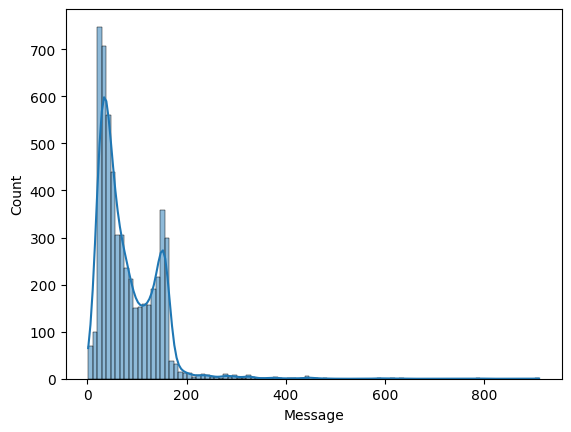

In [17]:
sn.histplot(df['Message'].apply(len),bins=100,kde=True)

### Train Test Split

In [18]:
X=df['Message']
Y=df['Category']

In [19]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [20]:
print(Y)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5572, dtype: int64


In [30]:
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.2, random_state=2)

In [31]:
print(X.shape,X_train.shape, X_test.shape)

(5572,) (4457,) (1115,)


Vectorizing

In [32]:
tdidf=TfidfVectorizer(lowercase=True)
X_train=tdidf.fit_transform(X_train)
X_test=tdidf.transform(X_test)

In [33]:
X_train

<4457x7719 sparse matrix of type '<class 'numpy.float64'>'
	with 59180 stored elements in Compressed Sparse Row format>

**As you can see the data is Highly inbalanced, so we have to do something about it.**

<Axes: xlabel='Category'>

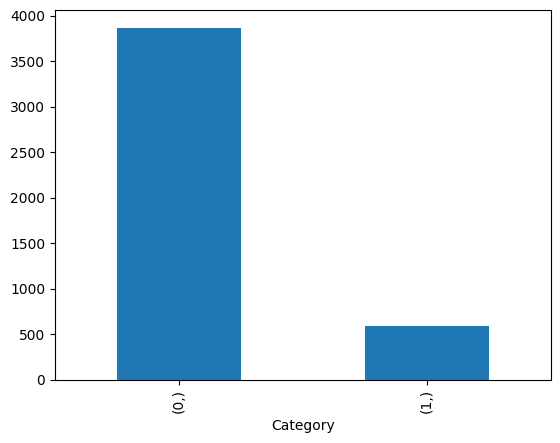

In [34]:
pd.DataFrame(Y_train).value_counts().plot(kind="bar")

### So we balancing both the classes using the RandomOverSampler

In [35]:
from imblearn.over_sampling import RandomOverSampler

sampler=RandomOverSampler(random_state=42)
# We will pass to it the output of Vectorizer from train data

X_train_resampled, Y_train_resampled=sampler.fit_resample(X_train, Y_train)

<Axes: xlabel='Category'>

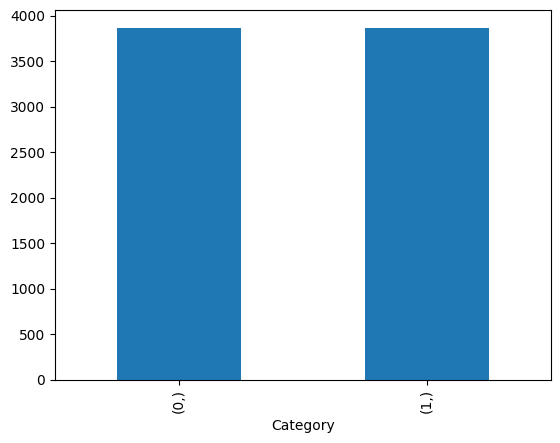

In [36]:
pd.DataFrame(Y_train_resampled).value_counts().plot(kind="bar")

**As you can see our data is distributed properly.**

## Model Training

### Logistic Regression

In [37]:
lr=LogisticRegression()
lr.fit(X_train_resampled, Y_train_resampled)

LogisticRegression()

In [44]:
print("Train Accuracy: ", lr.score(X_train_resampled, Y_train_resampled))
print("Test Accuracy: ", lr.score(X_test, Y_test))


print("Train Precision: ", precision_score(Y_train_resampled, lr.predict(X_train_resampled)))
print("Test Precision: ", precision_score(Y_test, lr.predict(X_test)))

Train Accuracy:  0.9943123061013444
Test Accuracy:  0.9775784753363229
Train Precision:  0.9940568475452196
Test Precision:  0.9523809523809523


### MultinomialNB

In [45]:
nv=MultinomialNB()
nv.fit(X_train_resampled, Y_train_resampled)

MultinomialNB()

In [46]:
print("Train Accuracy: ", nv.score(X_train_resampled, Y_train_resampled))
print("Test Accuracy: ", nv.score(X_test, Y_test))


print("Train Precision: ", precision_score(Y_train_resampled, nv.predict(X_train_resampled)))
print("Test Precision: ", precision_score(Y_test, nv.predict(X_test)))

Train Accuracy:  0.9926318510858325
Test Accuracy:  0.9757847533632287
Train Precision:  0.9932694796790059
Test Precision:  0.906832298136646


### SVC

In [47]:
sv=SVC()
sv.fit(X_train_resampled, Y_train_resampled)

SVC()

In [48]:
print("Train Accuracy: ", sv.score(X_train_resampled, Y_train_resampled))
print("Test Accuracy: ", sv.score(X_test, Y_test))


print("Train Precision: ", precision_score(Y_train_resampled, sv.predict(X_train_resampled)))
print("Test Precision: ", precision_score(Y_test, sv.predict(X_test)))

Train Accuracy:  1.0
Test Accuracy:  0.9811659192825112
Train Precision:  1.0
Test Precision:  1.0


#### We are taking here MultinomialNB model from Naive Bayes.

**Confusion matrix for the selected model**

In [50]:
cf=confusion_matrix(Y_test, nv.predict(X_test))
cf

array([[942,  15],
       [ 12, 146]])

<Axes: >

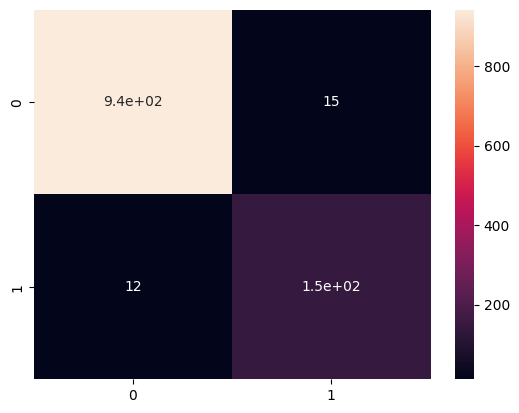

In [51]:
sn.heatmap(cf, annot=True)

## Prediction

**Test case 1**

In [54]:
input_text="Even my brother is not like to speak with me. They treat me like aids patent."
print(input_text)

print('')

vector_converted_text=tdidf.transform([input_text])

print('The email type is: ')
print(le.inverse_transform(nv.predict(vector_converted_text)))

Even my brother is not like to speak with me. They treat me like aids patent.

The email type is: 
['ham']


**Test case 2**

In [55]:
input_text="WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only."
print(input_text)

print('')

vector_converted_text=tdidf.transform([input_text])
print('The email type is: ')
print(le.inverse_transform(nv.predict(vector_converted_text)))

WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.

The email type is: 
['spam']
